In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math  # เพิ่มบรรทัดนี้
# from google.colab import drive
# drive.mount("/content/drive")

     StudentID  HW1  HW2  Final  Total Grade
212        213   84   98    100     96     S
198        199   99   89     92     93     S
269        270   93   89     93     92     S
2            3  100   90     89     92     S
241        242   90   91     91     91     S


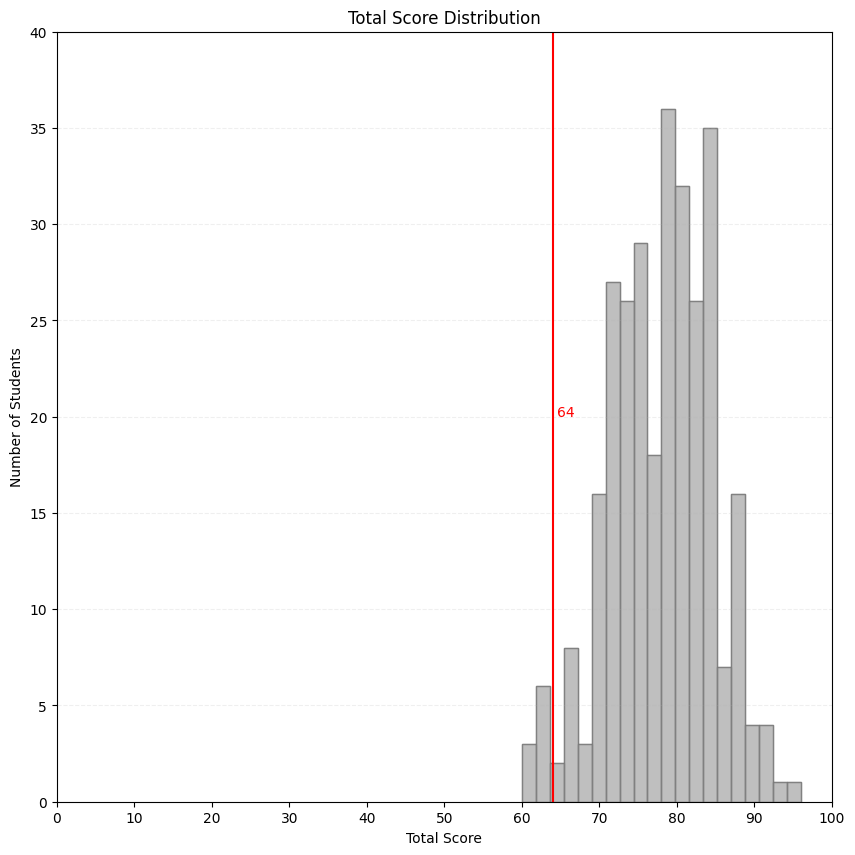

In [10]:
# ---
# Group No. 2
# 1. จิรกานต์  แก้วภิรมภ์    6410450389
# 2. ธนัตถ์     แซ่ฉั่ว         6410450478
# 3. อาทิตยา เกตเลขวัตร  6410451938
# ---

group = 2
problem = 3 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"_output_"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"_plot_"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path)

# --- เริ่มเขียนโค้ดตรงนี้ ---

# คำนวณคะแนนรวมของแต่ละนักเรียน โดยใช้สูตรที่ระบุ
data['Total'] = data.apply(lambda row: math.ceil(0.25 * row['HW1'] + 0.25 * row['HW2'] + 0.5 * row['Final']), axis=1)

#คำนวณค่าเฉลี่ยของคะแนนรวมทั้งหมดในคอลัมน์ 'Total'
mean = data['Total'].mean()

#คำนวณค่าปริมาตรมาตรฐานของคะแนนรวมในคอลัมน์ 'Total'
std_deviation = data['Total'].std()

# คำนวณค่า cutoff โดยใช้สูตรที่ระบุ ค่า cutoff คือค่าที่ใช้ในการแบ่งนักเรียนออกเป็นกลุ่มที่ผ่าน (S) และไม่ผ่าน (U) โดยจะเป็นคะแนนที่ต่ำกว่าค่า cutoff.
cutoff = math.floor(mean - 2 * std_deviation)

# สร้างฟังก์ชัน get_grade(total) เพื่อกำหนดเกรดของนักเรียน
# โดยรับค่าคะแนนรวม (total) เป็นอาร์กิวเมนต์
def get_grade(total):
    if total >= cutoff:
        return 'S'  # ถ้าคะแนนรวมมากกว่าหรือเท่ากับค่า cutoff กำหนดเกรด 'S'
    else:
        return 'U'  # ถ้าคะแนนรวมน้อยกว่าค่า cutoff กำหนดเกรด 'U'

# ใช้คำสั่ง data['Total'].apply(get_grade) เพื่อสร้างคอลัมน์ 'Grade' ใหม่ใน DataFrame 'data'
# โดยใช้ฟังก์ชัน get_grade เพื่อคำนวณเกรดตามคะแนนรวมในคอลัมน์ 'Total'
data['Grade'] = data['Total'].apply(get_grade)

# เรียงลำดับข้อมูลตามคะแนนรวมจากมากไปน้อย
data = data.sort_values(by='Total', ascending=False)

# สร้างกราฟ
# กำหนดขนาดกราฟ
plt.figure(figsize=(10, 10))
# กำหนดเส้นเกณฑ์คะแนนขั้นต่ำ
plt.axvline(x=cutoff, color='red' )
#คำนวณหาค่าสูงสุดของแกน Y ในกราฟ histogram
max_height = max(plt.hist(data['Total'], bins=20, edgecolor='black', color='gray', alpha=0.5)[0])
# ปรับค่าสูงสุดของแกน Y เพื่อให้หาร 5 ลงตัว
while max_height % 5 != 0:
    max_height += 1
# กำหนดค่าสูงสุดของแกน Y
plt.ylim(0, max_height)
# กำหนดคะแนนขั้นต่ำ
plt.text(cutoff+0.5, max_height/2, str(cutoff), rotation=0, fontsize=10, color='red')
# กำหนดประเภทกราฟ และ ลักษณะกราฟ
plt.hist(data['Total'],bins=20, edgecolor="grey", color="silver", alpha=0.5)
# กำหนดค่าในช่วงแกน X
plt.xlim(0,100)
# กำหนดความยาวและการแบ่งช่วงแกน Y
plt.yticks(range(0,int(max_height+1),5))
# กำหนดความยาวและการแบ่งช่วงแกน X
plt.xticks(range(0, 101,10))
# กำหนดชื่อแกน X
plt.xlabel('Total Score')
# กำหนดชื่อแกน Y
plt.ylabel('Number of Students')
# กำหนดชื่อแผนภูมิ histogram
plt.title('Total Score Distribution')
# กำหนดเส้นประแบ่งช่วงในแกน Y
plt.grid(True, axis='y',alpha=0.2,linestyle='--')

# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
print(data.head())

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()